In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('Pneumothorax4000.csv')

In [4]:
df.head()

,Image Index,Insufficient Quality,Atelectasis,Cardiomegaly,Consolidation,Pulmonary Edema,Emphysema,Fracture,Hernia,Infiltration,...,Interstitial Infiltration,Not Sure,Bad Labeler,Cavity,Reticular Infiltration,Fibrosis,ICD,Support Device,Skinfold,High confidence
0,0.9948_45537123-876,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.9931_44337938-109789,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.9518_46384654-26050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5956_44732120-47734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.5938_47743056-3894,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [5]:
df.columns

Index(['Image Index', 'Insufficient Quality', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Pulmonary Edema', 'Emphysema', 'Fracture', 'Hernia',
       'Infiltration', 'Lung Opacity', 'Mass', 'Nodule', 'Pleural Effusion',
       'Pleural Thickening', 'Pneumothorax', 'Scoliosis', 'Tuberculosis',
       'Normal', 'Other', 'Paratracheal Thickening', 'Bronchiectasis',
       'Interstitial Infiltration', 'Not Sure', 'Bad Labeler', 'Cavity',
       'Reticular Infiltration', 'Fibrosis', 'ICD', 'Support Device',
       'Skinfold', 'High confidence'],
      dtype='object')

In [6]:
df['Pneumothorax Balanced'] = df['Image Index'].apply(lambda x: float(x.split('_')[0]))
df = df.sort_values(by=['Pneumothorax Balanced'])

In [7]:
df['Support Device2'] = df['Support Device']-df['ICD']

In [8]:
df[df['Support Device2']== -1.0]

,Image Index,Insufficient Quality,Atelectasis,Cardiomegaly,Consolidation,Pulmonary Edema,Emphysema,Fracture,Hernia,Infiltration,...,Bad Labeler,Cavity,Reticular Infiltration,Fibrosis,ICD,Support Device,Skinfold,High confidence,Pneumothorax Balanced,Support Device2
3264,0.0405_47443528-23527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0405,-1.0
1135,0.3089_47418006-1867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3089,-1.0
1045,0.3518_47418006-967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3518,-1.0
1030,0.3605_45971669-121273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3605,-1.0
1292,0.3752_47535717-6086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.3752,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.9999_45230396-7955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.9999,-1.0
42,0.9999_44277939-435084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.9999,-1.0
43,0.9999_44277939-434612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.9999,-1.0
45,0.9999_44277939-317602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.9999,-1.0


In [9]:
df.loc[36]['Support Device2'] = 0.0
df.loc[21]['Support Device2'] = 0.0

/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2758/218324944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[36]['Support Device2'] = 0.0
/var/folders/m4/mqwz4y154cd5h9gpw9pwh86m0000gn/T/ipykernel_2758/218324944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[21]['Support Device2'] = 0.0


In [10]:
df['CVAT page'] = list(range(4459))

In [11]:
L = []
for i in df['Pneumothorax Balanced']:
    if i > 0.8 :
        L.append(1.0)
    else :
        L.append(0.0)
df['Pneumothorax by AI'] = L  

In [12]:
# FP 
FP = df[(df['Pneumothorax']==0.0)&(df['Pneumothorax by AI']== 1.0)]
ICD = df[df['ICD']== 1.0]
noPneumothorax = df[(df['Pneumothorax']==0.0)]

In [13]:
len(ICD)

247

In [14]:
FP[FP['Support Device']==1.0]

,Image Index,Insufficient Quality,Atelectasis,Cardiomegaly,Consolidation,Pulmonary Edema,Emphysema,Fracture,Hernia,Infiltration,...,Reticular Infiltration,Fibrosis,ICD,Support Device,Skinfold,High confidence,Pneumothorax Balanced,Support Device2,CVAT page,Pneumothorax by AI
506,0.8069_45482052-6927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.8069,0.0,3809,1.0
505,0.8082_45275244-4303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.8082,0.0,3810,1.0
504,0.8086_47395350-15194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.8086,1.0,3811,1.0
503,0.8103_47046352-10175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.8103,1.0,3812,1.0
502,0.8104_45139535-1682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.8104,1.0,3813,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,0.9999_47232107-10730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.9999,0.0,4434,1.0
2980,0.9999_46649933-2972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.9999,0.0,4436,1.0
2824,0.9999_45345807-1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.9999,1.0,4437,1.0
37,0.9999_47295055-32190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.9999,1.0,4441,1.0


# Sensitivity and Specificity and PPV

In [15]:
TP = df[(df['Pneumothorax by AI']==1.0)&(df['Pneumothorax']==1.0)]
FP = df[(df['Pneumothorax by AI']==1.0)&(df['Pneumothorax']==0.0)]
TN = df[(df['Pneumothorax by AI']==0.0)&(df['Pneumothorax']==0.0)]
FN = df[(df['Pneumothorax by AI']==0.0)&(df['Pneumothorax']==1.0)]

In [16]:
print(len(TP),len(TN),len(FP),len(FN))

94 3803 557 5


In [17]:
sensitivity = len(TP)/(len(TP)+len(FN))
specificity = len(TN)/(len(TN)+len(FP))
PPV = len(TP)/(len(TP)+len(FP))
NPV = len(TN)/(len(TN)+len(FN))
print(sensitivity,specificity,NPV)
print('PPV =', PPV)

0.9494949494949495 0.8722477064220183 0.998686974789916
PPV = 0.1443932411674347


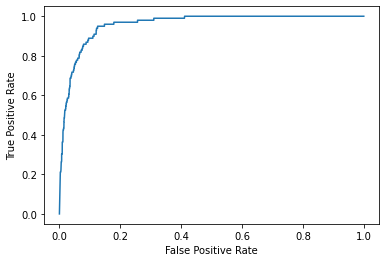

AUC score = 0.9584885552775462


In [18]:
# AUC score 
FPR,TPR,tresholds = roc_curve(df['Pneumothorax'],df['Pneumothorax Balanced'])
plt.plot(FPR,TPR)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('AUC score =', roc_auc_score(df['Pneumothorax'],df['Pneumothorax Balanced']))

In [78]:
# Calculate F1 score 
F1 = [] 
PPVF1 = []
senseF1 = []
for i in tresholds : 
    TP1 = len(df[((df['Pneumothorax Balanced']>= i)&(df['Pneumothorax']==1.0))])
    FN1 = len(df[((df['Pneumothorax Balanced'] < i)&(df['Pneumothorax']==1.0))])
    FP1 = len(df[((df['Pneumothorax Balanced'] >= i)&(df['Pneumothorax']==0.0))])
    if TP1 != 0 :
        PPV1 = TP1/(TP1+FP1)
        sense1 = TP1/(TP1+FN1)
        F1.append(2*(sense1*PPV1)/(sense1+PPV1))
        PPVF1.append(PPV1)
        senseF1.append(sense1)
    else :
        F1.append(0)
        PPVF1.append(0)
        senseF1.append(0)

In [20]:
F1 = np.array(F1)
np.where(F1 == np.max(F1))

(array([43]),)

In [21]:
np.max(F1)

0.45414847161572053

In [22]:
PPVF1[40]

0.4032258064516129

In [23]:
senseF1[40]

0.5050505050505051

In [24]:
tresholds[40]

0.9906

In [25]:
table = pd.DataFrame({'Treshold':tresholds,'F1 score':F1})

In [77]:
table.head()

,Treshold,F1 score
0,1.9999,0.000000
1,0.9999,0.256000
2,0.9998,0.315789
3,0.9997,0.311111
4,0.9995,0.306569


In [27]:
# Using treshold of 0.994 resulted in highest F1 score of 0.61 , PPV = 0.5 , sensitivity = 0.77 

# False positive cases analysis 

# Supportive device analysis 

In [28]:
# 60% of all FP cases have supportive device 
len(FP[FP['Support Device']==1.0])/len(FP)

0.5206463195691203

In [29]:
# 50% of normal distribution have supportive device
len(noPneumothorax[noPneumothorax['Support Device']==1.0])/len(noPneumothorax)

0.4823394495412844

In [30]:
# P-value that Device in FP cases > normal distribution 
L = []
for i in range(10000):
    rFP = FP.sample(len(FP),replace = True)
    L.append(len(rFP[rFP['Support Device']==1.0])/len(rFP))
L = np.array(L)
np.sum(L<=0.46574095151377193)/len(L)

0.0052

In [31]:
# mean balanced score in cases that have no device
noPneumothorax[noPneumothorax['Support Device']==1.0]['Pneumothorax Balanced'].mean()

0.2841010461245839

In [32]:
# mean balanced score in cases that have device
noPneumothorax[noPneumothorax['Support Device']==0.0]['Pneumothorax Balanced'].mean()

0.25478772707133396

In [33]:
0.2841010461245839-0.25478772707133396

0.029313319053249964

In [34]:
L = []
for i in range(10000):
    rnoPneumothorax = noPneumothorax.sample(len(noPneumothorax),replace = True)
    device = rnoPneumothorax[rnoPneumothorax['Support Device']==1.0]['Pneumothorax Balanced'].mean()
    nodevice = rnoPneumothorax[rnoPneumothorax['Support Device']==0.0]['Pneumothorax Balanced'].mean()
    L.append(device - nodevice)
L = np.array(L)
print(np.percentile(L,2.5), np.percentile(L,97.5))

0.010486023909951353 0.0476196884165059


# ICD analysis 

In [35]:
# 21% of FP cases have ICD 
len(FP[FP['ICD']==1.0])/len(FP)

0.21005385996409337

In [36]:
# there are only 4% ICD in normal distributioin 
len(noPneumothorax[noPneumothorax['ICD']==1.0])/len(noPneumothorax)

0.047706422018348627

In [37]:
len(FP[FP['ICD']==1.0])

117

In [38]:
len(FP)

557

In [39]:
# P-value that ICD in FP cases > normal distribution 
L = []
for i in range(10000):
    rFP = FP.sample(len(FP),replace = True)
    L.append(len(rFP[rFP['ICD']==1.0])/len(rFP))
L = np.array(L)
np.sum(L<=0.0502)/len(L)

0.0

In [40]:
# mean balanced score in cases that have ICD
noPneumothorax[noPneumothorax['ICD']==1.0]['Pneumothorax Balanced'].mean()

0.6765668269230768

In [41]:
# mean balanced score in cases that have no ICD
noPneumothorax[noPneumothorax['ICD']==0.0]['Pneumothorax Balanced'].mean()

0.2485054190751445

In [42]:
L = []
for i in range(10000):
    rnoPneumothorax = noPneumothorax.sample(len(noPneumothorax),replace = True)
    ICD = rnoPneumothorax[rnoPneumothorax['ICD']==1.0]['Pneumothorax Balanced'].mean()
    noICD = rnoPneumothorax[rnoPneumothorax['ICD']==0.0]['Pneumothorax Balanced'].mean()
    L.append(ICD - noICD)
L = np.array(L)
print(np.percentile(L,2.5), np.percentile(L,97.5))

0.37739106178338494 0.4756979710749012


In [43]:
0.6979772321428571-0.2514218037898776

0.4465554283529795

In [79]:
# cases with ICD and have balanced score < 0.02
noPneumothorax[(noPneumothorax['ICD']==1.0)&(noPneumothorax['CVAT page']<= 800)].head()

,Image Index,Insufficient Quality,Atelectasis,Cardiomegaly,Consolidation,Pulmonary Edema,Emphysema,Fracture,Hernia,Infiltration,...,Reticular Infiltration,Fibrosis,ICD,Support Device,Skinfold,High confidence,Pneumothorax Balanced,Support Device2,CVAT page,Pneumothorax by AI
2523,0.0288_45470002-1411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0288,0.0,707,0.0
2505,0.0295_44530212-4895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0295,0.0,737,0.0


In [81]:
df[(df['ICD']==0.0)&(df['Pneumothorax Balanced'] < 0.0288)].head()

,Image Index,Insufficient Quality,Atelectasis,Cardiomegaly,Consolidation,Pulmonary Edema,Emphysema,Fracture,Hernia,Infiltration,...,Reticular Infiltration,Fibrosis,ICD,Support Device,Skinfold,High confidence,Pneumothorax Balanced,Support Device2,CVAT page,Pneumothorax by AI
4458,0.0060_46341170-444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0060,0.0,0,0.0
2821,0.0066_45660768-736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0066,0.0,1,0.0
3221,0.0070_47580436-1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0070,0.0,2,0.0
4457,0.0070_45501892-72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0070,0.0,3,0.0
3658,0.0070_45585496-72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0070,1.0,4,0.0


In [80]:
df[df['ICD']==0.0].head()

,Image Index,Insufficient Quality,Atelectasis,Cardiomegaly,Consolidation,Pulmonary Edema,Emphysema,Fracture,Hernia,Infiltration,...,Reticular Infiltration,Fibrosis,ICD,Support Device,Skinfold,High confidence,Pneumothorax Balanced,Support Device2,CVAT page,Pneumothorax by AI
4458,0.0060_46341170-444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0060,0.0,0,0.0
2821,0.0066_45660768-736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0066,0.0,1,0.0
3221,0.0070_47580436-1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0070,0.0,2,0.0
4457,0.0070_45501892-72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0070,0.0,3,0.0
3658,0.0070_45585496-72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0070,1.0,4,0.0


In [47]:
nPICD = noPneumothorax[(noPneumothorax['ICD']==1.0)]
nPnICD = nPICD = noPneumothorax[(noPneumothorax['ICD']==0.0)]

# Pleural effusion 

In [48]:
len(FP[FP['Pleural Effusion']==1.0])

210

In [49]:
len(FP[FP['Pleural Effusion']==1.0])/len(FP)

0.3770197486535009

In [50]:
len(noPneumothorax[noPneumothorax['Pleural Effusion']==1.0])/len(noPneumothorax)

0.26972477064220185

In [51]:
L = []
for i in range(10000):
    rFP = FP.sample(len(FP),replace = True)
    L.append(len(rFP[rFP['Pleural Effusion']==1.0])/len(rFP))
L = np.array(L)
np.sum(L<=0.26473935806965626)/len(L)

0.0

In [52]:
nPnICD[nPnICD['Pleural Effusion']==1.0]['Pneumothorax Balanced'].mean()

0.35186077738515925

In [53]:
nPnICD[nPnICD['Pleural Effusion']==0.0]['Pneumothorax Balanced'].mean()

0.209764271523179

In [54]:
0.36260733452593946-0.2106792854801706

0.15192804904576887

In [55]:
L = []
for i in range(10000):
    rnPnICD = nPnICD.sample(len(noPneumothorax),replace = True)
    ef = rnPnICD[rnPnICD['Pleural Effusion']==1.0]['Pneumothorax Balanced'].mean()
    noef = rnPnICD[rnPnICD['Pleural Effusion']==0.0]['Pneumothorax Balanced'].mean()
    L.append(ef - noef)
L = np.array(L)
print(np.percentile(L,2.5), np.percentile(L,97.5))

0.12193556366638128 0.16275411096105155


# Lung opacity without pleural effusion

In [56]:
# Opacity cases that dont have ICD and pleural effusion, Pneumothorax
Uopac = noPneumothorax[(noPneumothorax['ICD']==0.0)&(noPneumothorax['Pleural Effusion']==0.0)]
FPopac = FP[(FP['ICD']==0.0)&(FP['Pleural Effusion']==0.0)]

In [57]:
len(FP[FP['Lung Opacity']==1.0])

448

In [58]:
len(FPopac[FPopac['Lung Opacity']==1.0])

192

In [59]:
len(FPopac[FPopac['Lung Opacity']==1.0])/len(FPopac)

0.75

In [60]:
len(Uopac[Uopac['Lung Opacity']==1.0])/len(Uopac)

0.5205298013245033

In [61]:
Uopac[Uopac['Lung Opacity']==1.0]['Pneumothorax Balanced'].mean()

0.27318575063613243

In [62]:
Uopac[Uopac['Lung Opacity']==0.0]['Pneumothorax Balanced'].mean()

0.14091167127071824

In [63]:
L = []
for i in range(10000):
    rUopac = Uopac.sample(len(noPneumothorax),replace = True)
    ef = rUopac[rUopac['Lung Opacity']==1.0]['Pneumothorax Balanced'].mean()
    noef = rUopac[rUopac['Lung Opacity']==0.0]['Pneumothorax Balanced'].mean()
    L.append(ef - noef)
L = np.array(L)
print(np.percentile(L,2.5), np.percentile(L,97.5))

0.11649363624165235 0.1484409395329001


In [64]:
0.2748592336683418-0.14064880054832077

0.13421043312002104

# Heatmap outside chest wall 

In [65]:
# 5% of FP have heatmap outside chest wall 
len(FP[FP['Bad Labeler']==1.0])/len(FP)

0.08617594254937164

In [66]:
len(FP[FP['Bad Labeler']==1.0])

48

In [67]:
# only 1 % have bad labeler in normal distribution 
len(noPneumothorax[noPneumothorax['Bad Labeler']==1.0])/len(noPneumothorax)

0.014220183486238533

# Percent of False positive with skinfold  

In [68]:
len(FP[FP['Skinfold']==1.0])/len(FP)

0.06463195691202872

In [69]:
len(FP[FP['Skinfold']==1.0])

36

false positive - 7.8% Heatmap outside chest wall 
               - 4.7% skinfold 
               - 22.5% ICD -> (P-value 0.0) 
divice that is not ICD -> not relate to more diagnosis of pneumothorax by AI 


# High confidence

In [70]:
FP2 = df[(df['Pneumothorax by AI']==1.0)&(df['Pneumothorax']==0.0)
         &(df['High confidence']== 1.0)]

In [71]:
len(FP2)

182

In [72]:
PPV2 = len(TP)/(len(TP)+len(FP2))
PPV2

0.34057971014492755

In [73]:
FP3 = df[(df['Pneumothorax by AI']==1.0)&(df['Pneumothorax']==0.0)
         &(df['High confidence']== 1.0)&(df['Bad Labeler']== 0.0)]

In [74]:
PPV3 = len(TP)/(len(TP)+len(FP3))
PPV3

0.3900414937759336

In [75]:
FP4 = df[(df['Pneumothorax by AI']==1.0)&(df['Pneumothorax']==0.0)
         &(df['High confidence']== 1.0)&(df['Bad Labeler']== 0.0)
         &(df['Skinfold']== 0.0)]
PPV4 = len(TP)/(len(TP)+len(FP4))
PPV4

0.41228070175438597

In [76]:
len(FP[FP['Lung Opacity']==1.0])

448